In [171]:
import os
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv('breast.csv')
df2=df.set_index('Classification')
df2.index.name= 'Control Or Patient'
df2.rename(index={1:'Control'},inplace=True)
df2.rename(index={2:'Patient'},inplace=True)
print(df2.head())


                    Age        BMI  Glucose  Insulin      HOMA   Leptin  \
Control Or Patient                                                        
Control              48  23.500000       70    2.707  0.467409   8.8071   
Control              83  20.690495       92    3.115  0.706897   8.8438   
Control              82  23.124670       91    4.498  1.009651  17.9393   
Control              68  21.367521       77    3.226  0.612725   9.8827   
Control              86  21.111111       92    3.549  0.805386   6.6994   

                    Adiponectin  Resistin    MCP.1  
Control Or Patient                                  
Control                9.702400   7.99585  417.114  
Control                5.429285   4.06405  468.786  
Control               22.432040   9.27715  554.697  
Control                7.169560  12.76600  928.220  
Control                4.819240  10.57635  773.920  


In [172]:
df3= df2.groupby(['Control Or Patient']).mean()
print(df3)

                          Age        BMI     Glucose    Insulin      HOMA  \
Control Or Patient                                                          
Control             58.076923  28.317336   88.230769   6.933769  1.552398   
Patient             56.671875  26.984740  105.562500  12.513219  3.623342   

                       Leptin  Adiponectin   Resistin       MCP.1  
Control Or Patient                                                 
Control             26.637933    10.328205  11.614813  499.730692  
Patient             26.596512    10.061167  17.253777  563.016500  


Based on comparison of means, Glucose, insulin, HOMA, Resistin, and MCP.1 appear to have the strongest potential correlation.
First, I will create boxplots in order to show outliers which I will then remove.  Then, I will create bar plots and scatter plots to compare values of the cleaned data.  These steps will answer the questions:
    -Can I make a box-plot
    -Can I make bar plots
    -Can I make scatter plots

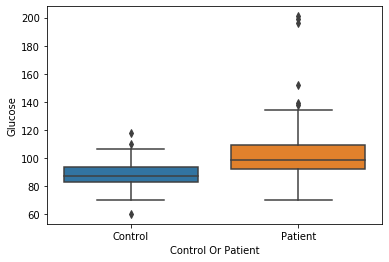

In [58]:
import seaborn as sns
import numpy as np
sns.boxplot(x= df2.index, y= df.Glucose)
plt.show()

In [229]:
from scipy.stats import iqr
GC= df2['Glucose'].loc[df2.index == 'Control']
Gy= list(np.quantile(GC, [.25,.75]))
GC_IQR= iqr(GC)
Outliers_GC= []
Outliers_GC.append(int(np.percentile(GC, [25])-(1.5*(GC_IQR))))
Outliers_GC.append(int(np.percentile(GC, [75])+(1.5*(GC_IQR))))
print(Outliers_GC)

[67, 109]


In [230]:
GP= df2['Glucose'].loc[df2.index != 'Control']
Gz= list(np.quantile(GP, [.25,.75]))
GP_IQR= iqr(GP)
Outliers_GP= []
Outliers_GP.append(int(np.percentile(GP, [25])-(1.5*(GP_IQR))))
Outliers_GP.append(int(np.percentile(GP, [75])+(1.5*(GP_IQR))))
print(Outliers_GP)

[66, 134]


In [231]:
GC_filter = (GC >= Outliers_GC[0]) & (GC <= Outliers_GC[1])
GC_Final= GC.loc[GC_filter]

GP_filter = (GP >= Outliers_GP[0]) & (GP <= Outliers_GP[1])
GP_Final= GP.loc[GP_filter]

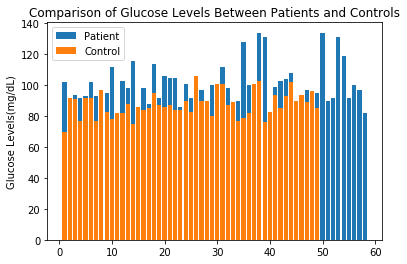

In [232]:
plt.bar(range(1,len(GP_Final)+1), GP_Final)
plt.bar(range(1,len(GC_Final)+1), GC_Final)
plt.ylabel('Glucose Levels(mg/dL)')
plt.title('Comparison of Glucose Levels Between Patients and Controls')
plt.legend(['Patient', 'Control'])
plt.show()

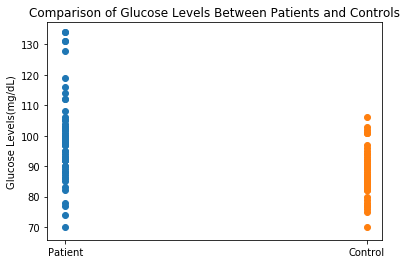

In [238]:
plt.scatter(x= GP_Final.index, y= GP_Final )
plt.scatter(x= GC_Final.index, y=GC_Final)
plt.ylabel('Glucose Levels(mg/dL)')
plt.title('Comparison of Glucose Levels Between Patients and Controls')
plt.show()

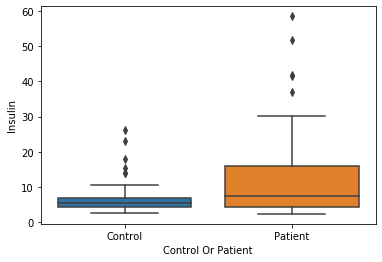

In [136]:
import seaborn as sns
sns.boxplot(x= df2.index, y= df.Insulin)
plt.show()

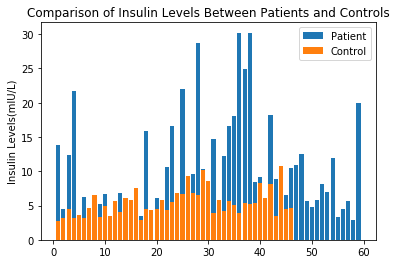

In [228]:
IC= df2['Insulin'].loc[df2.index == 'Control']
Iy= list(np.quantile(IC, [.25,.75]))
IC_IQR= iqr(IC)
Outliers_IC= []
Outliers_IC.append(int(np.percentile(IC, [25])-(1.5*(IC_IQR))))
Outliers_IC.append(int(np.percentile(IC, [75])+(1.5*(IC_IQR))))

IP= df2['Insulin'].loc[df2.index != 'Control']
Iz= list(np.quantile(IP, [.25,.75]))
IP_IQR= iqr(IP)
Outliers_IP= []
Outliers_IP.append(int(np.percentile(IP, [25])-(1.5*(IP_IQR))))
Outliers_IP.append(int(np.percentile(IP, [75])+(1.5*(IP_IQR))))

IC_filter = (IC >= Outliers_IC[0]) & (IC <= Outliers_IC[1])
IC_Final= IC.loc[IC_filter]

IP_filter = (IP >= Outliers_IP[0]) & (IP <= Outliers_IP[1])
IP_Final= IP.loc[IP_filter]

plt.bar(range(1,len(IP_Final)+1), IP_Final)
plt.bar(range(1,len(IC_Final)+1), IC_Final)
plt.ylabel('Insulin Levels(mIU/L)')
plt.title('Comparison of Insulin Levels Between Patients and Controls')
plt.legend(['Patient', 'Control'])
plt.show()

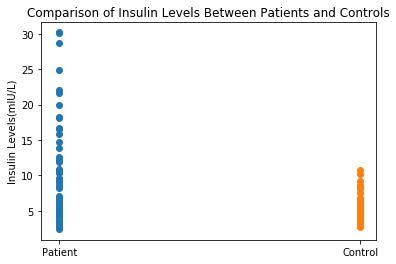

In [239]:
plt.scatter(x= IP_Final.index, y= IP_Final )
plt.scatter(x= IC_Final.index, y=IC_Final)
plt.ylabel('Insulin Levels(mIU/L)')
plt.title('Comparison of Insulin Levels Between Patients and Controls')
plt.show()

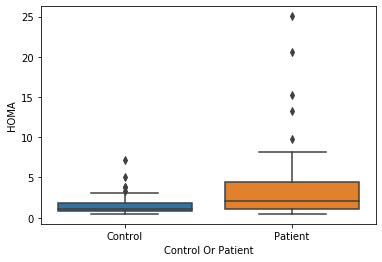

In [142]:
import seaborn as sns
sns.boxplot(x= df2.index, y= df.HOMA)
plt.show()

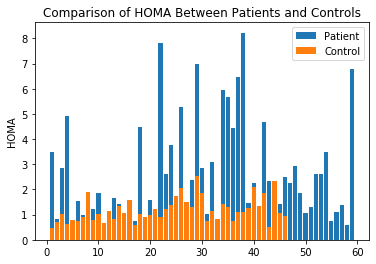

In [242]:
HC= df2['HOMA'].loc[df2.index == 'Control']
Hy= list(np.quantile(HC, [.25,.75]))
HC_IQR= iqr(HC)
Outliers_HC= []
Outliers_HC.append(int(np.percentile(HC, [25])-(1.5*(HC_IQR))))
Outliers_HC.append(int(np.percentile(HC, [75])+(1.5*(HC_IQR))))

HP= df2['HOMA'].loc[df2.index != 'Control']
Hz= list(np.quantile(HP, [.25,.75]))
HP_IQR= iqr(HP)
Outliers_HP= []
Outliers_HP.append(int(np.percentile(HP, [25])-(1.5*(HP_IQR))))
Outliers_HP.append(int(np.percentile(HP, [75])+(1.5*(HP_IQR))))

HC_filter = (HC >= Outliers_HC[0]) & (HC <= Outliers_HC[1])
HC_Final= HC.loc[HC_filter]

HP_filter = (HP >= Outliers_HP[0]) & (HP <= Outliers_HP[1])
HP_Final= HP.loc[HP_filter]

plt.bar(range(1,len(HP_Final)+1), HP_Final)
plt.bar(range(1,len(HC_Final)+1), HC_Final)
plt.ylabel('HOMA')
plt.title('Comparison of HOMA Between Patients and Controls')
plt.legend(['Patient', 'Control'])
plt.show()

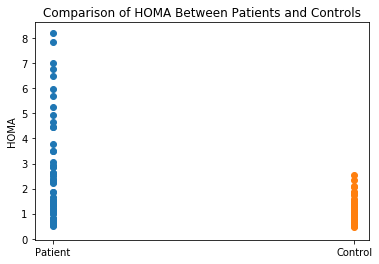

In [243]:
plt.scatter(x= HP_Final.index, y= HP_Final )
plt.scatter(x= HC_Final.index, y=HC_Final)
plt.ylabel('HOMA')
plt.title('Comparison of HOMA Between Patients and Controls')
plt.show()

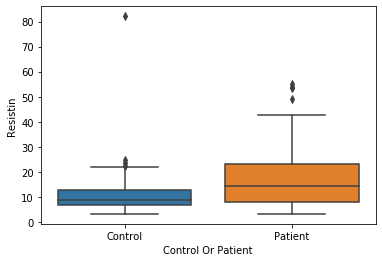

In [143]:
import seaborn as sns
sns.boxplot(x= df2.index, y= df.Resistin)
plt.show()

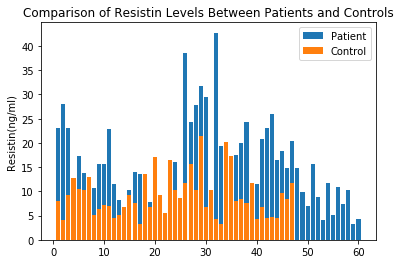

In [226]:
RC= df2['Resistin'].loc[df2.index == 'Control']
Ry= list(np.quantile(RC, [.25,.75]))
RC_IQR= iqr(RC)
Outliers_RC= []
Outliers_RC.append(int(np.percentile(RC, [25])-(1.5*(RC_IQR))))
Outliers_RC.append(int(np.percentile(RC, [75])+(1.5*(RC_IQR))))

RP= df2['Resistin'].loc[df2.index != 'Control']
Rz= list(np.quantile(RP, [.25,.75]))
RP_IQR= iqr(RP)
Outliers_RP= []
Outliers_RP.append(int(np.percentile(RP, [25])-(1.5*(RP_IQR))))
Outliers_RP.append(int(np.percentile(RP, [75])+(1.5*(RP_IQR))))

RC_filter = (RC >= Outliers_RC[0]) & (RC <= Outliers_RC[1])
RC_Final= RC.loc[RC_filter]

RP_filter = (RP >= Outliers_RP[0]) & (RP <= Outliers_RP[1])
RP_Final= RP.loc[RP_filter]

plt.bar(range(1,len(RP_Final)+1), RP_Final)
plt.bar(range(1,len(RC_Final)+1), RC_Final)
plt.ylabel('Resistin(ng/ml)')
plt.title('Comparison of Resistin Levels Between Patients and Controls')
plt.legend(['Patient', 'Control'])
plt.show()

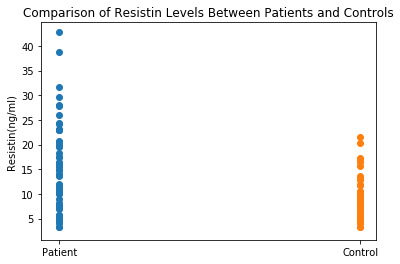

In [244]:
plt.scatter(x= RP_Final.index, y= RP_Final )
plt.scatter(x= RC_Final.index, y=RC_Final)
plt.ylabel('Resistin(ng/ml)')
plt.title('Comparison of Resistin Levels Between Patients and Controls')
plt.show()

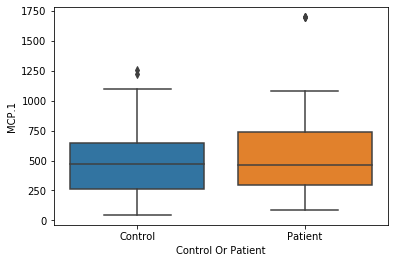

In [26]:
import seaborn as sns
sns.boxplot(x= df2.index, y= df2['MCP.1'])
plt.show()

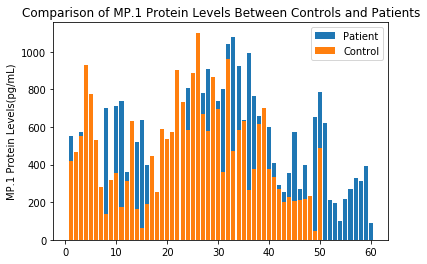

In [225]:
MC= df2['MCP.1'].loc[df2.index == 'Control']
My= list(np.quantile(MC, [.25,.75]))
MC_IQR= iqr(MC)
Outliers_MC= []
Outliers_MC.append(int(np.percentile(MC, [25])-(1.5*(MC_IQR))))
Outliers_MC.append(int(np.percentile(MC, [75])+(1.5*(MC_IQR))))

MP= df2['MCP.1'].loc[df2.index !='Control']
Mz= list(np.quantile(MP, [.25,.75]))
MP_IQR= iqr(MP)
Outliers_MP= []
Outliers_MP.append(int(np.percentile(MP, [25])-(1.5*(MP_IQR))))
Outliers_MP.append(int(np.percentile(MP, [75])+(1.5*(MP_IQR))))

MC_filter = (MC >= Outliers_MC[0]) & (MC <= Outliers_MC[1])
MC_Final= MC.loc[MC_filter]

MP_filter = (MP >= Outliers_MP[0]) & (MP <= Outliers_MP[1])
MP_Final= MP.loc[MP_filter]

plt.bar(range(1,len(MP_Final)+1), MP_Final)
plt.bar(range(1,len(MC_Final)+1), MC_Final)
plt.ylabel('MP.1 Protein Levels(pg/mL)')
plt.title('Comparison of MP.1 Protein Levels Between Controls and Patients')
plt.legend(['Patient', 'Control'])
plt.show()

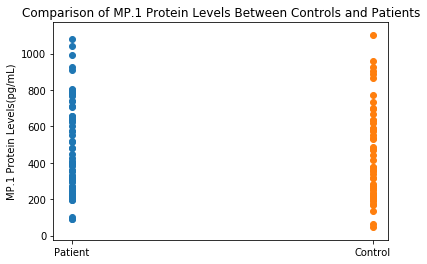

In [245]:
plt.scatter(x= MP_Final.index, y= MP_Final )
plt.scatter(x= MC_Final.index, y=MC_Final)
plt.ylabel('MP.1 Protein Levels(pg/mL)')
plt.title('Comparison of MP.1 Protein Levels Between Controls and Patients')
plt.show()